In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


In [7]:
data = pd.read_csv("/media/jax/01DAE00EEA8B1B80/programing/python/ArabinAICourse/studentDepression/studentdepression/data/raw/Student Depression Dataset.csv")

In [8]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [9]:
data.shape

(27901, 18)

In [10]:
NumOfRecordsBefore = len(data)

In [11]:
pd.DataFrame(data.isna().sum()).T

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0


<Axes: >

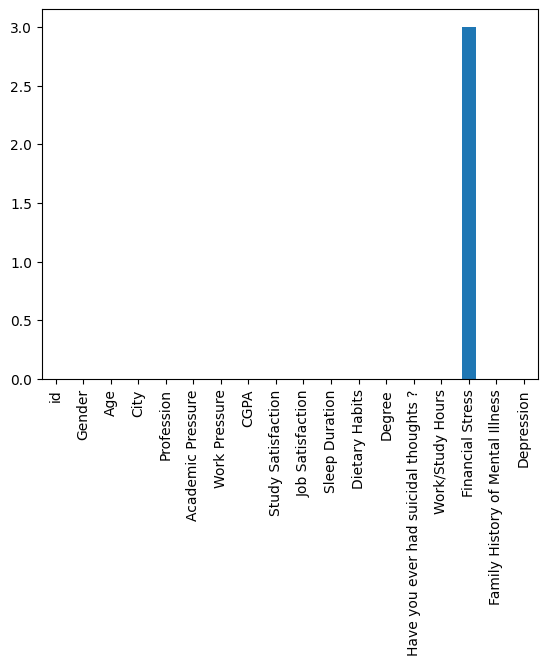

In [12]:
data.isna().sum().plot(kind='bar')

In [13]:
data.dropna(subset=['Financial Stress'],inplace=True)

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
columns = ['City','Profession','Sleep Duration','Dietary Habits','Degree']

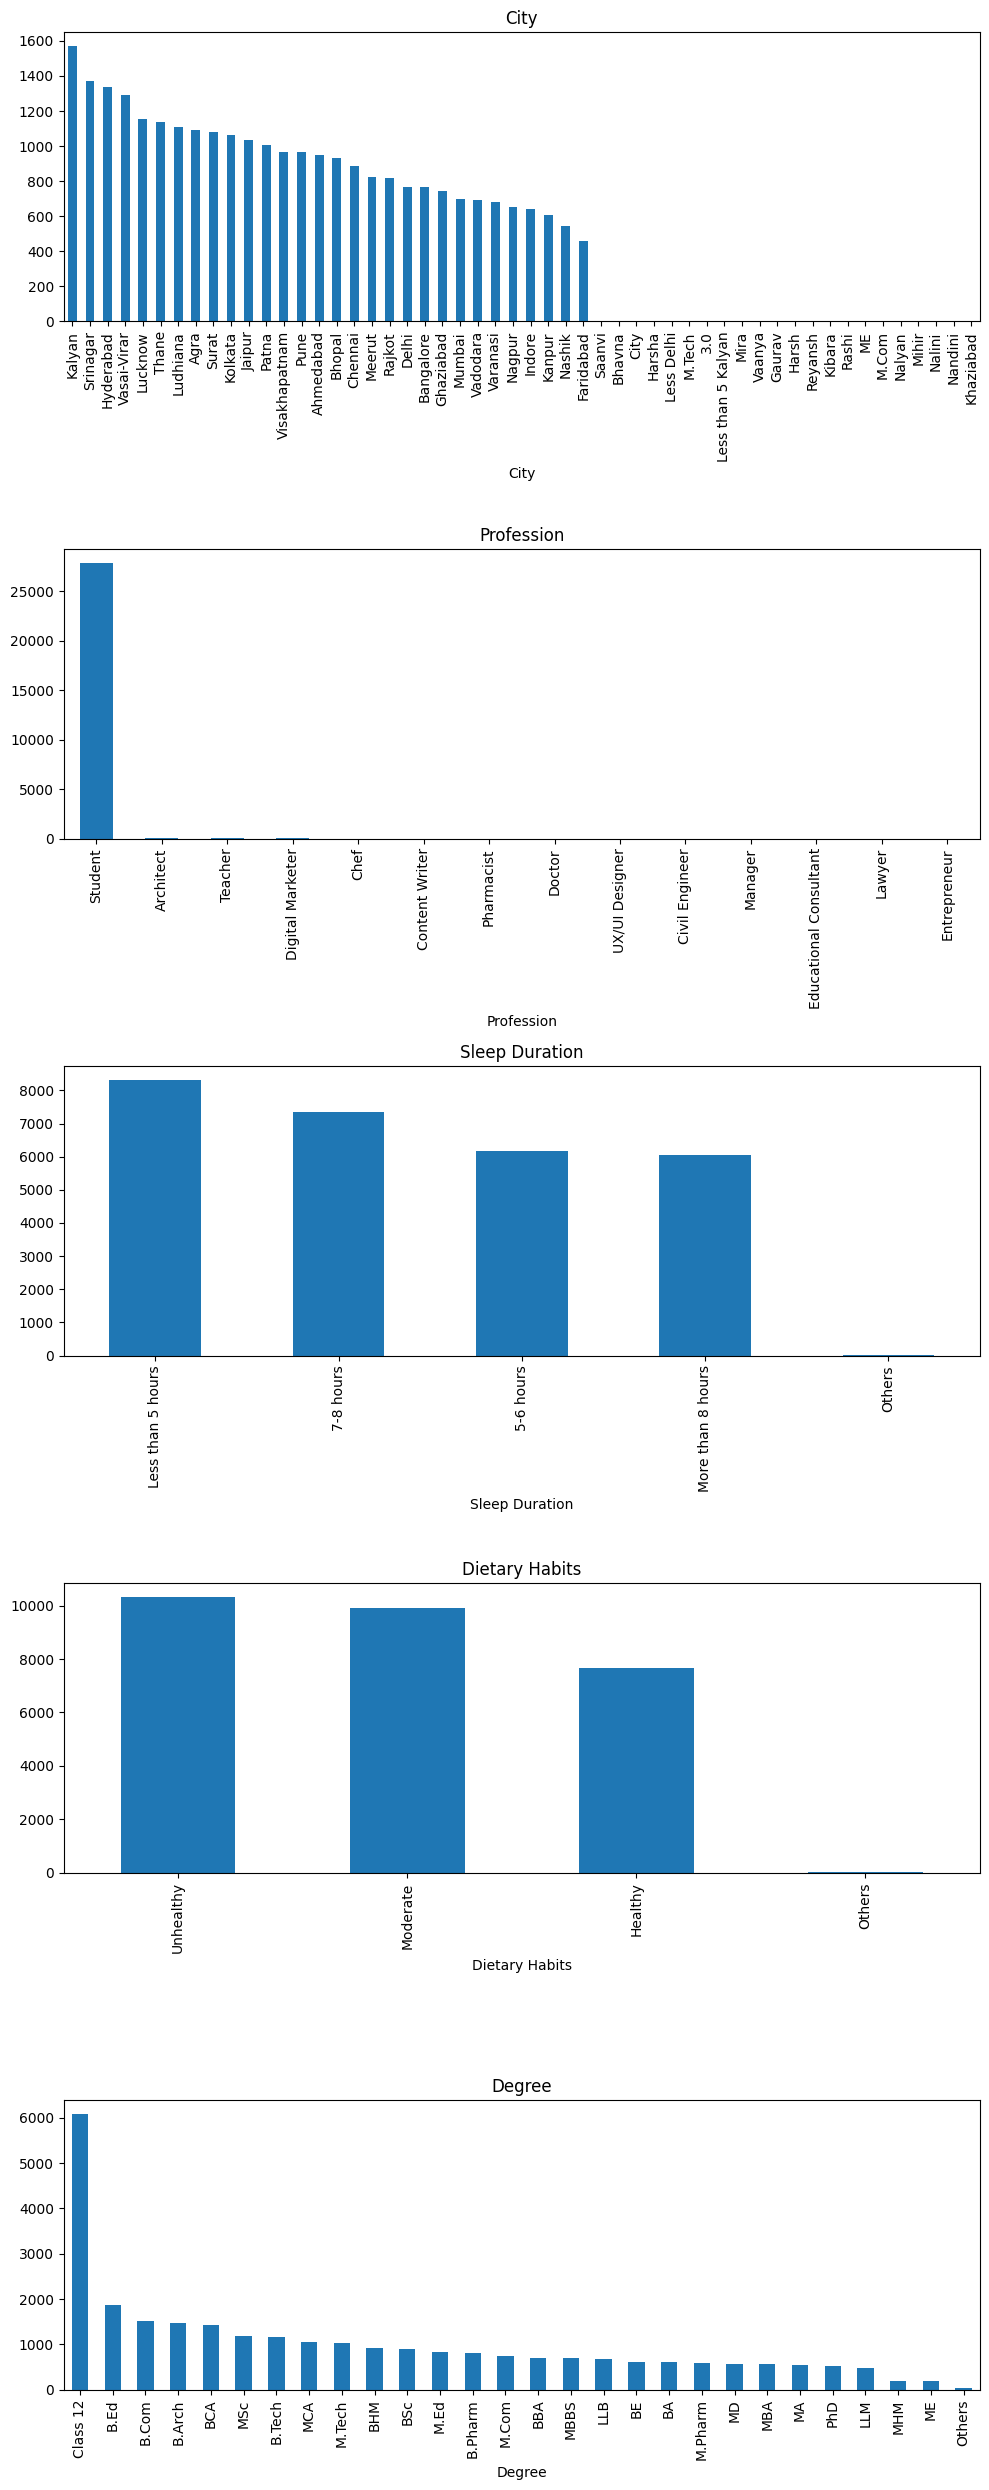

In [16]:
fig, axs = plt.subplots(5)
for i,column in enumerate(columns):
    value_counts = data[column].value_counts()
    value_counts.plot(kind='bar', ax=axs[i], title=column, figsize=(10, 25))
    #axs[i].tick_params(axis='x', rotation=45)
plt.tight_layout()


<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

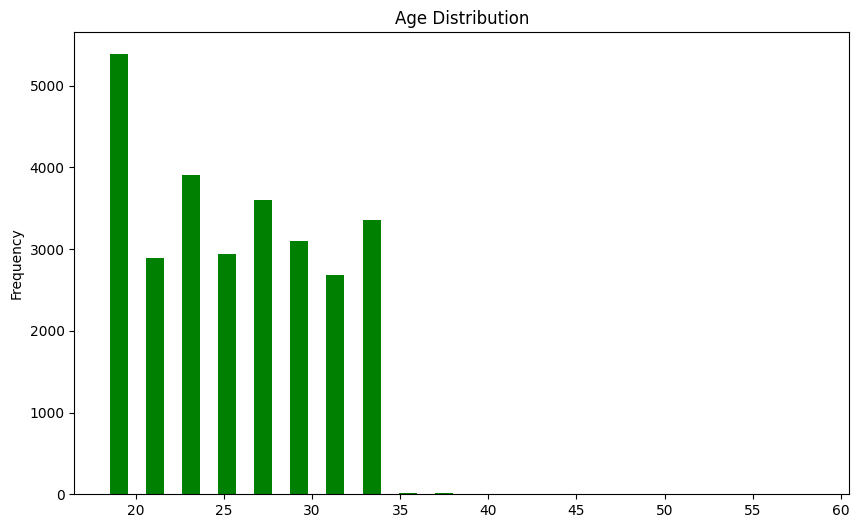

In [17]:
data['Age'].plot(kind='hist', bins=20, color= 'green',title='Age Distribution', rwidth=0.5,figsize=(10, 6))

In [18]:
records = len(data)
persentage = int(0.001 * records)
print(f"Records less than {persentage} will be removed")

Records less than 27 will be removed


In [19]:
for column in columns:
    value_counts = data[column].value_counts()
    masking = value_counts < persentage
    index = masking[masking].index
    print(index)
    rows_to_remove_mask = data[column].isin(index)
    print(rows_to_remove_mask)
    data = data[~rows_to_remove_mask]
    data[column] = data[column].astype('category')


Index(['Saanvi', 'Bhavna', 'City', 'Harsha', 'Less Delhi', 'M.Tech', '3.0',
       'Less than 5 Kalyan', 'Mira', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh',
       'Kibara', 'Rashi', 'ME', 'M.Com', 'Nalyan', 'Mihir', 'Nalini',
       'Nandini', 'Khaziabad'],
      dtype='object', name='City')
0        False
1        False
2        False
3        False
4        False
         ...  
27896    False
27897    False
27898    False
27899    False
27900    False
Name: City, Length: 27898, dtype: bool
Index(['Architect', 'Teacher', 'Digital Marketer', 'Chef', 'Content Writer',
       'Pharmacist', 'Doctor', 'UX/UI Designer', 'Civil Engineer', 'Manager',
       'Educational Consultant', 'Lawyer', 'Entrepreneur'],
      dtype='object', name='Profession')
0        False
1        False
2        False
3        False
4        False
         ...  
27896    False
27897    False
27898    False
27899    False
27900    False
Name: Profession, Length: 27872, dtype: bool
Index(['Others'], dtype='object', name='

category
category
category
category
category


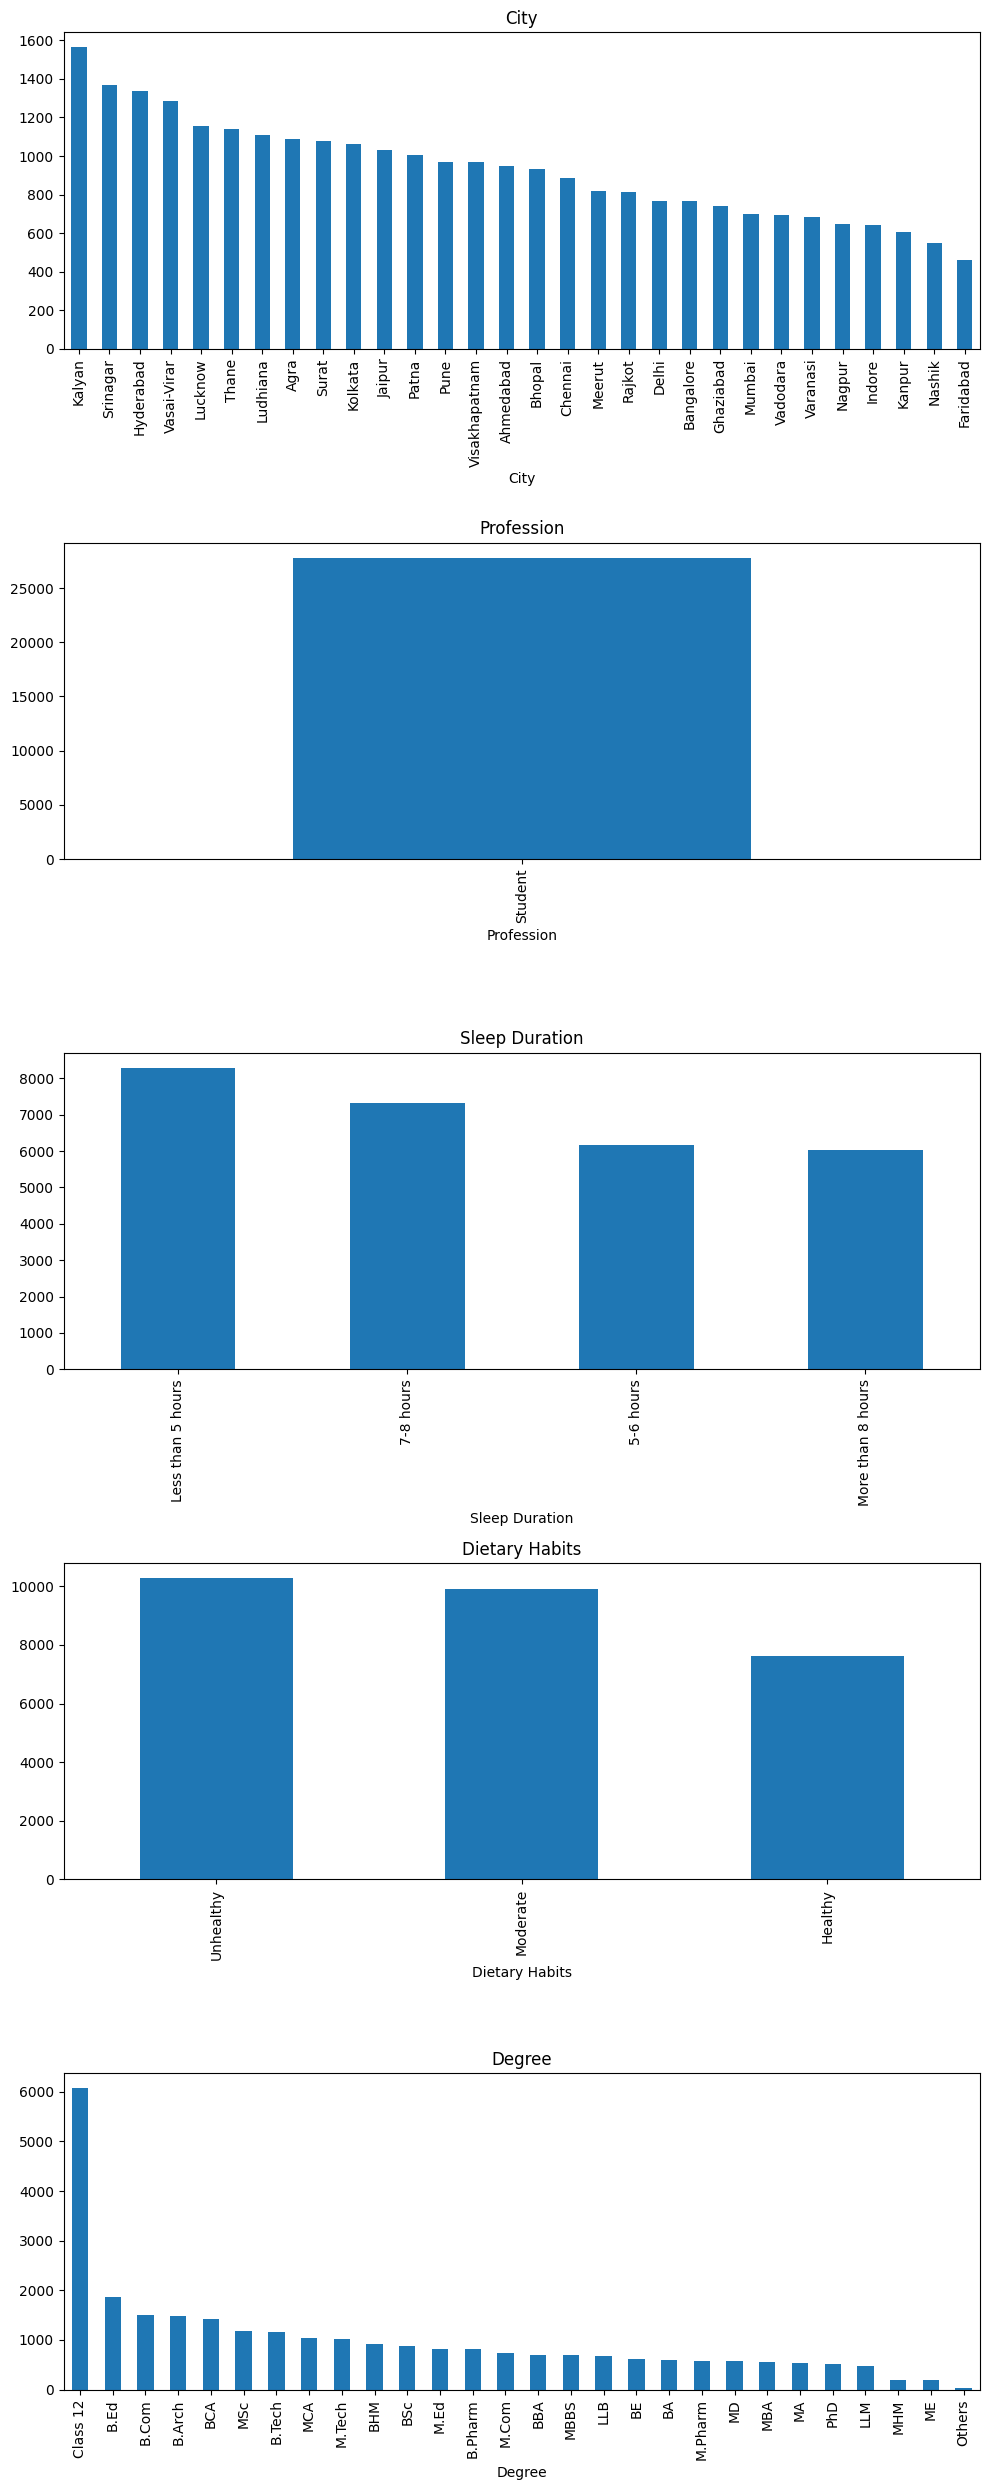

In [20]:
fig, axs = plt.subplots(5)
for i,column in enumerate(columns):
    value_counts = data[column].value_counts()
    value_counts.plot(kind='bar', ax=axs[i], title=column, figsize=(10, 25))
    print(data[column].dtype)
plt.tight_layout()


In [21]:
data.drop(columns=['id','Profession'], inplace=True)

In [22]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    value_counts = data[column].value_counts()
    masking = value_counts < persentage
    index = masking[masking].index
    rows_to_remove_mask = data[column].isin(index)
    data = data[~rows_to_remove_mask]

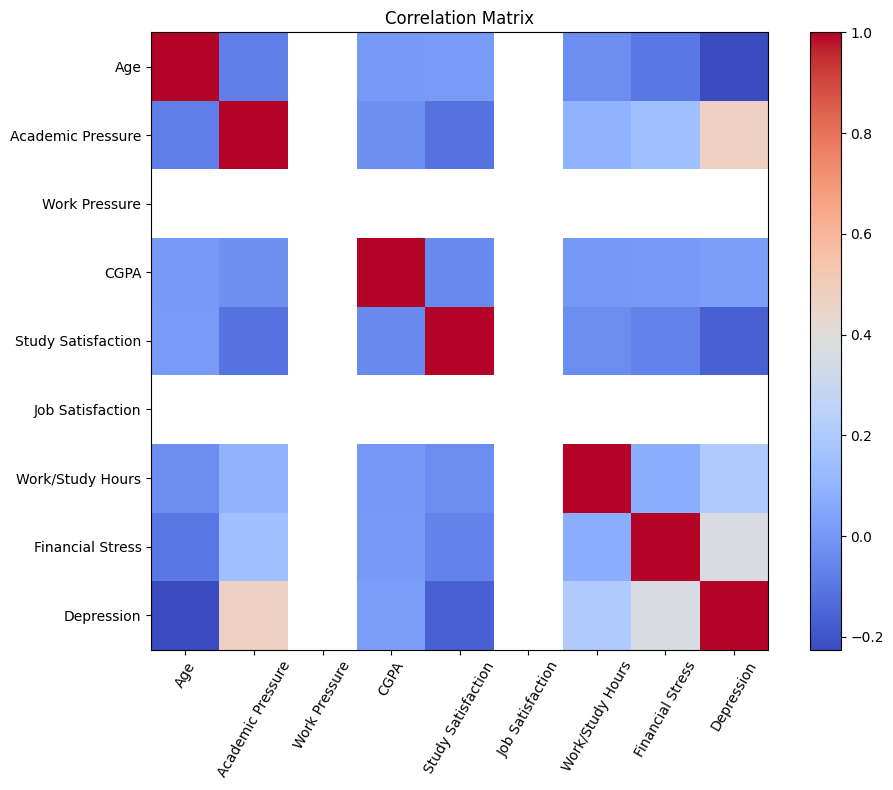

In [23]:
corrolation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.imshow(corrolation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=60)
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.tight_layout()

<Axes: xlabel='Work Pressure'>

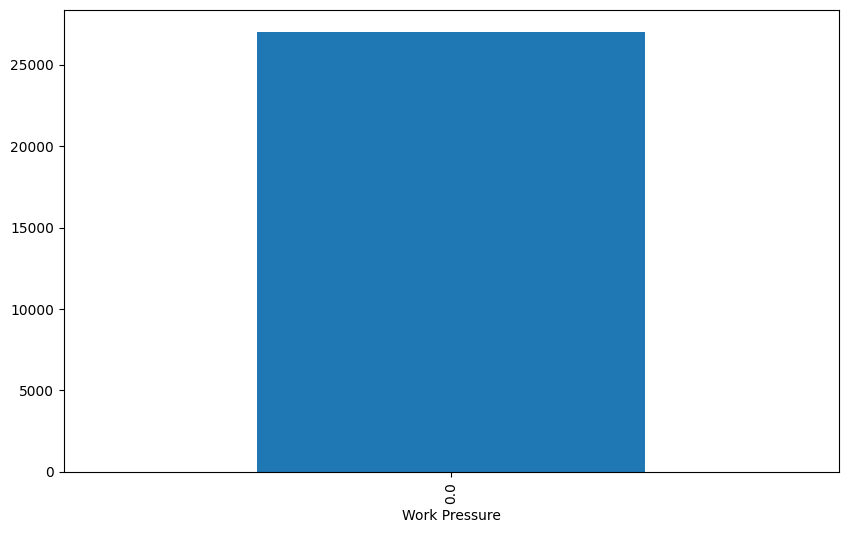

In [24]:
data['Work Pressure'].value_counts().plot(kind='bar', figsize=(10, 6))

<Axes: ylabel='Frequency'>

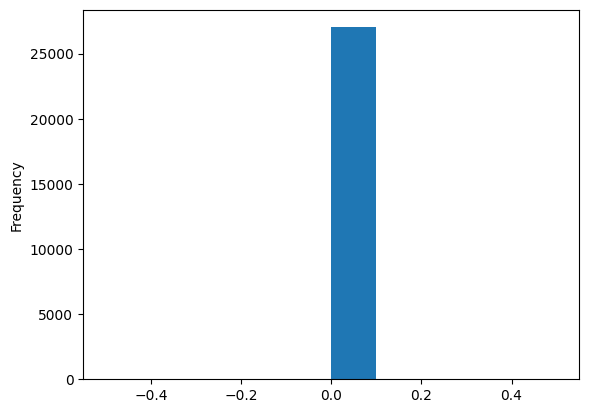

In [25]:
data['Job Satisfaction'].plot(kind='hist')

In [26]:
data.drop(columns=['Job Satisfaction','Work Pressure'], inplace=True)

In [27]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

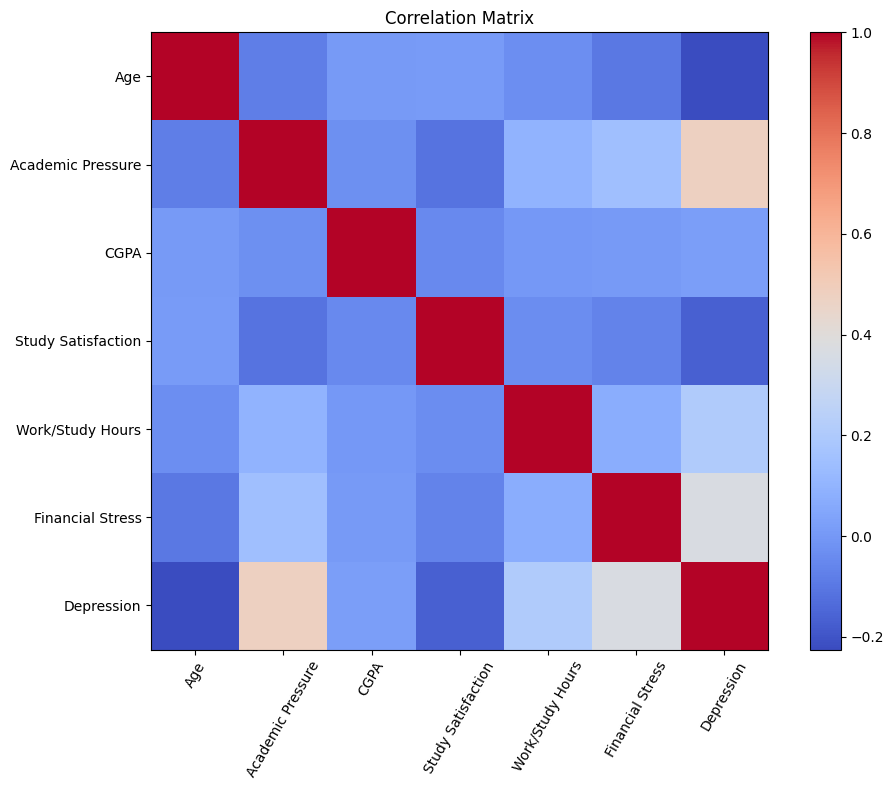

In [28]:
corrolation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.imshow(corrolation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=60)
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.tight_layout()

In [29]:
data.shape

(27020, 14)

In [30]:
NumOfRecordsAfter = len(data)

In [31]:
percentOfRecordsRemain = (NumOfRecordsAfter/NumOfRecordsBefore)*100

In [32]:
percentOfRecordsRemain

96.84240708218343

In [33]:
data.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [34]:
data.groupby('Sleep Duration')['Depression'].agg([sum,np.mean])

/tmp/ipykernel_10063/1384757439.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Sleep Duration')['Depression'].agg([sum,np.mean])
/tmp/ipykernel_10063/1384757439.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.groupby('Sleep Duration')['Depression'].agg([sum,np.mean])
/tmp/ipykernel_10063/1384757439.py:1: FutureWarning: The provided callable <function mean at 0x78a7e1068540> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.groupby('Sleep Duration')['Depression

,sum,mean
Sleep Duration,,
5-6 hours,3391,0.568960
7-8 hours,4253,0.596577
Less than 5 hours,5219,0.645437
More than 8 hours,2971,0.508298


In [35]:
data.groupby('Depression')[['CGPA','Age','Study Satisfaction','Work/Study Hours']].mean()

,CGPA,Age,Study Satisfaction,Work/Study Hours
Depression,,,,
0,7.634360,27.092437,3.212766,6.238691
1,7.695043,24.872679,2.753947,7.813061


In [36]:
data.pivot_table(values=['CGPA','Age','Depression'],index='Gender',aggfunc=['median','mean'])

median                        mean                     
          Age  CGPA Depression        Age      CGPA Depression
Gender                                                        
Female   25.0  7.72        1.0  25.735408  7.611326   0.584955
Male     26.0  7.83        1.0  25.836049  7.716204   0.586844

In [37]:
data.pivot_table(values=['CGPA','Age','Depression'],index='Gender',columns='City')

/tmp/ipykernel_10063/1376346104.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data.pivot_table(values=['CGPA','Age','Depression'],index='Gender',columns='City')


Age                                                        \
City         Agra  Ahmedabad Bangalore     Bhopal    Chennai      Delhi   
Gender                                                                    
Female  25.324074  25.569975    25.025  25.226601  25.058333  25.587719   
Male    25.499200  24.274908    24.600  25.500000  24.929870  25.673367   

                                                    ... Depression            \
City    Faridabad  Ghaziabad  Hyderabad     Indore  ...      Patna      Pune   
Gender                                              ...                        
Female  27.047847  26.016779  25.830579  24.466667  ...   0.650794  0.573086   
Male    25.670732  26.179245  25.904059  25.188854  ...   0.612521  0.559687   

                                                                    \
City      Rajkot  Srinagar     Surat     Thane  Vadodara  Varanasi   
Gender                                                               
Female  0.626335  0.601246  0.566038  0.582031  0.547315  0.587189   
Male    0.626719  0.518090  0.586572  0.601653  0.575862  0.486842   

                                  
City   Vasai-Virar Visakhapatnam  
Gender                            
Female    0.578947      0.558242  
Male      0.566071      0.594017  

[2 rows x 90 columns]

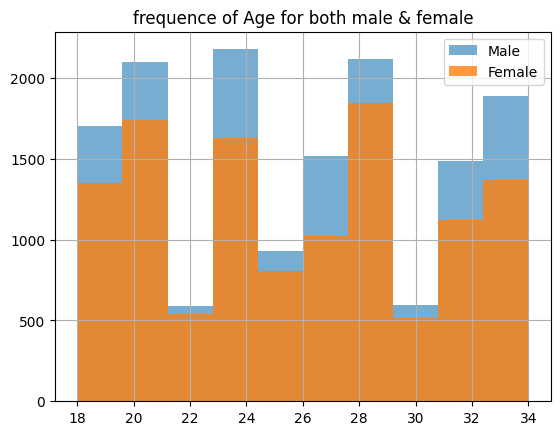

In [67]:
data[data['Gender']=='Male']['Age'].hist(alpha=0.6)
data[data['Gender']=='Female']['Age'].hist(alpha=0.8)
plt.title('frequence of Age for both male & female')
plt.legend(['Male','Female'])

In [39]:
def encode_and_save_mappings_inplace(df, column_names):
    mappings = []
    for column_name in column_names:
        if df[column_name].dtype == 'category' or df[column_name].dtype == 'object':
            unique_values = df[column_name].unique()
            mapping = {value: index for index, value in enumerate(unique_values)}
            mappings.append({column_name: mapping})
            df[column_name] = df[column_name].map(mapping)

    return df, mappings

In [40]:
columns_to_encode = ['City','Degree']
df , mapping = encode_and_save_mappings_inplace(data,columns_to_encode)


In [41]:
mapping

[{'City': {'Visakhapatnam': 0,
   'Bangalore': 1,
   'Srinagar': 2,
   'Varanasi': 3,
   'Jaipur': 4,
   'Pune': 5,
   'Thane': 6,
   'Chennai': 7,
   'Nagpur': 8,
   'Nashik': 9,
   'Vadodara': 10,
   'Kalyan': 11,
   'Rajkot': 12,
   'Ahmedabad': 13,
   'Kolkata': 14,
   'Mumbai': 15,
   'Lucknow': 16,
   'Indore': 17,
   'Surat': 18,
   'Ludhiana': 19,
   'Bhopal': 20,
   'Meerut': 21,
   'Agra': 22,
   'Ghaziabad': 23,
   'Hyderabad': 24,
   'Vasai-Virar': 25,
   'Kanpur': 26,
   'Patna': 27,
   'Faridabad': 28,
   'Delhi': 29}},
 {'Degree': {'B.Pharm': 0,
   'BSc': 1,
   'BA': 2,
   'BCA': 3,
   'M.Tech': 4,
   'PhD': 5,
   'Class 12': 6,
   'B.Ed': 7,
   'LLB': 8,
   'BE': 9,
   'M.Ed': 10,
   'MSc': 11,
   'BHM': 12,
   'M.Pharm': 13,
   'MCA': 14,
   'MA': 15,
   'B.Com': 16,
   'MD': 17,
   'MBA': 18,
   'MBBS': 19,
   'M.Com': 20,
   'B.Arch': 21,
   'LLM': 22,
   'B.Tech': 23,
   'BBA': 24,
   'ME': 25,
   'MHM': 26,
   'Others': 27}}]

In [42]:
desired_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
ord_encoder = OrdinalEncoder(categories=[desired_order])
ordinal = ord_encoder.fit_transform(df[['Sleep Duration']])
df['Sleep Duration'] = ordinal.astype(int)

In [43]:
df.reset_index(drop=True, inplace=True)

In [44]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])
print(one_hot_encoded.shape)
print(df.shape) 

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
print(one_hot_df.index)
print(df.index)
final_df = pd.concat([df, one_hot_df], axis=1).drop(categorical_columns, axis=1)
print(final_df.shape)


(27020, 6)
(27020, 14)
RangeIndex(start=0, stop=27020, step=1)
RangeIndex(start=0, stop=27020, step=1)
(27020, 17)


In [77]:

json_object = json.dumps(mapping, indent=4)
with open("/media/jax/01DAE00EEA8B1B80/programing/python/ArabinAICourse/studentDepression/studentdepression/reports/binaryMap.json", "w") as outfile:
    outfile.write(json_object)

In [46]:
genders = data['Gender'].value_counts()
def func(pca,allvalues):
    abslut = pca/100*np.sum(allvalues)
    return "{:.1f}%".format(pca)

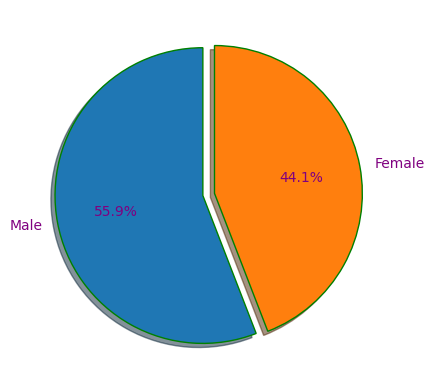

In [47]:
plt.pie(genders,labels=genders.index,shadow=True,wedgeprops={'linewidth':1,'edgecolor': "green"},
        startangle=90,explode=[0.05,0.03],autopct= lambda pca : func(pca,genders), textprops=dict(color="purple"))
plt.show()

In [48]:
final_df.sort_values(["CGPA","Age"],ascending=[False,True],inplace=True)

In [49]:
final_df

,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,Gender_Female,Gender_Male,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes
11253,18.0,18,2.0,10.00,3.0,2,Unhealthy,6,8.0,4.0,1,0.0,1.0,0.0,1.0,0.0,1.0
980,19.0,17,1.0,10.00,3.0,3,Moderate,6,2.0,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0
19924,19.0,2,1.0,10.00,5.0,3,Unhealthy,6,6.0,1.0,0,1.0,0.0,1.0,0.0,0.0,1.0
14792,20.0,29,4.0,10.00,5.0,0,Moderate,6,11.0,5.0,1,1.0,0.0,1.0,0.0,1.0,0.0
7328,21.0,24,5.0,10.00,4.0,3,Unhealthy,11,5.0,5.0,1,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,34.0,22,2.0,5.08,5.0,0,Moderate,23,8.0,4.0,0,1.0,0.0,1.0,0.0,0.0,1.0
12169,34.0,10,2.0,5.08,2.0,2,Healthy,17,1.0,5.0,0,1.0,0.0,1.0,0.0,0.0,1.0
20340,34.0,17,2.0,5.08,3.0,0,Unhealthy,23,2.0,4.0,0,1.0,0.0,1.0,0.0,1.0,0.0
23083,34.0,6,4.0,5.08,2.0,2,Healthy,3,4.0,2.0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [76]:
final_df.to_csv('/media/jax/01DAE00EEA8B1B80/programing/python/ArabinAICourse/studentDepression/studentdepression/data/processed/Student Depression Dataset.csv', index=False)

In [50]:
final_df['CGPA'] /= 2.5

In [51]:
is_BSc = final_df['Degree'].isin([1])
BSc_students = final_df[is_BSc]

In [52]:
BSC_students =  BSc_students[['Age','Academic Pressure','CGPA','Sleep Duration','Work/Study Hours']]

In [53]:
BSC_students.head(10)

,Age,Academic Pressure,CGPA,Sleep Duration,Work/Study Hours
4169,23.0,1.0,4.0,0,10.0
14971,23.0,1.0,4.0,3,12.0
17524,23.0,3.0,4.0,3,1.0
18622,23.0,3.0,4.0,0,1.0
19743,23.0,3.0,4.0,0,8.0
24875,23.0,4.0,4.0,0,10.0
2471,26.0,3.0,4.0,0,3.0
4347,33.0,4.0,4.0,0,8.0
6259,33.0,4.0,4.0,3,10.0
19647,33.0,4.0,4.0,0,4.0


In [54]:
total = len(BSC_students)
is_above_3 = BSC_students['CGPA'] >3.5
BSC_Student_3CGPA = BSC_students[is_above_3]
above_3 = len(BSC_Student_3CGPA) 

In [55]:
(above_3/total)*100

27.744982290436838

Text(0.5, 1.0, 'GPA Above 3.5 Age Distribution')

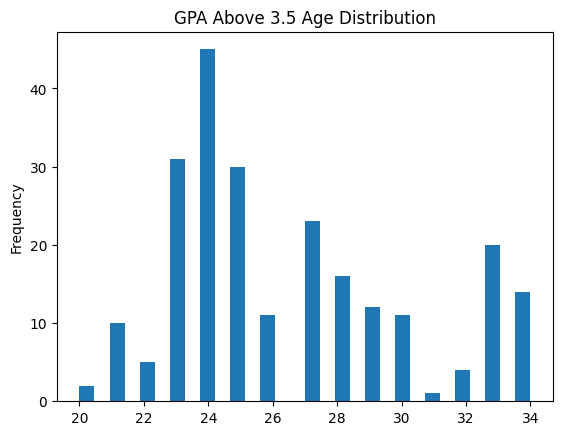

In [69]:
BSC_Student_3CGPA.Age.plot(kind='hist',bins=30)
plt.title('GPA Above 3.5 Age Distribution')

In [57]:
Age_CGPA = BSC_Student_3CGPA.groupby('Age')['CGPA'].mean()

In [58]:
Age_CGPA

Age
20.0    3.604000
21.0    3.774800
22.0    3.833600
23.0    3.845419
24.0    3.727111
25.0    3.802400
26.0    3.790909
27.0    3.662087
28.0    3.822250
29.0    3.785667
30.0    3.781091
31.0    3.936000
32.0    3.836000
33.0    3.841000
34.0    3.786857
Name: CGPA, dtype: float64

Text(0.5, 1.0, 'Average CGPA by Age for BSc Students with GPA Above 3.5')

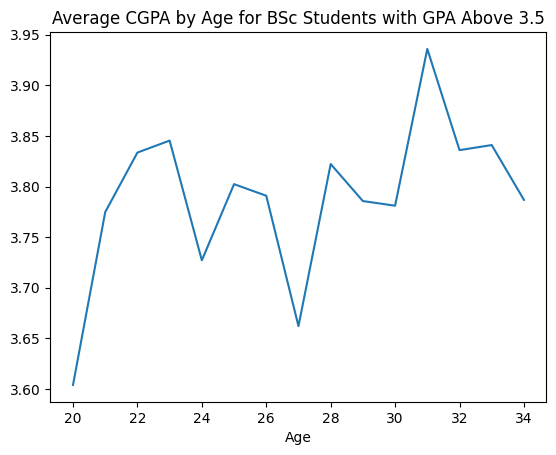

In [71]:
Age_CGPA.plot(kind='line')
plt.title('Average CGPA by Age for BSc Students with GPA Above 3.5')

Text(0.5, 1.0, 'Work/Study Hours Distribution for BSc Students with GPA Above 3.5')

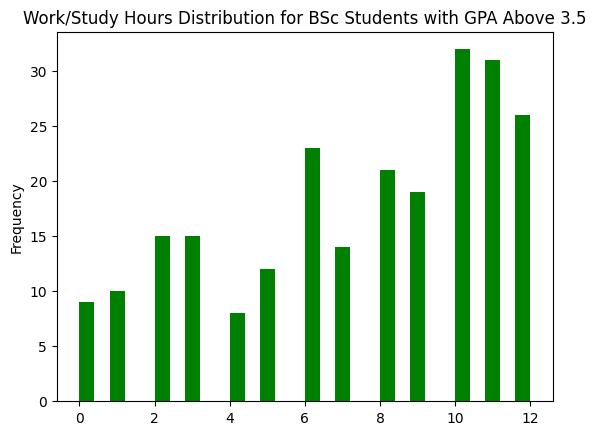

In [72]:
BSC_Student_3CGPA['Work/Study Hours'].plot(kind='hist',bins=30,color='green')
plt.title('Work/Study Hours Distribution for BSc Students with GPA Above 3.5')

Text(0.5, 1.0, 'Academic Pressure Distribution for BSc Students with GPA Above 3.5')

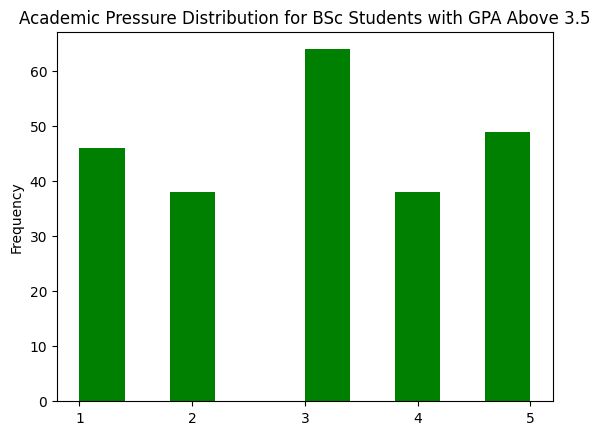

In [73]:
BSC_Student_3CGPA['Academic Pressure'].plot(kind='hist',color='green',xticks=[1,2,3,4,5])
plt.title('Academic Pressure Distribution for BSc Students with GPA Above 3.5')

Text(0.5, 1.0, 'CGPA Distribution for BSc Students')

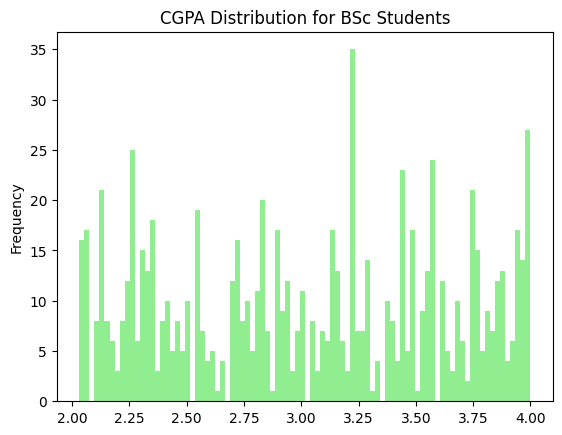

In [74]:
BSC_students['CGPA'].plot(kind='hist',color='lightgreen',bins=90)
plt.title('CGPA Distribution for BSc Students')

In [63]:
BSC_students['CGPA'].value_counts(sort=True)

CGPA
3.216    30
2.128    21
2.064    17
3.580    16
2.548    12
         ..
2.260     1
2.156     1
2.180     1
2.100     1
2.040     1
Name: count, Length: 224, dtype: int64

In [64]:
BSC_students['CGPA'].value_counts(normalize=True)*100

CGPA
3.216    3.541913
2.128    2.479339
2.064    2.007084
3.580    1.889020
2.548    1.416765
           ...   
2.260    0.118064
2.156    0.118064
2.180    0.118064
2.100    0.118064
2.040    0.118064
Name: proportion, Length: 224, dtype: float64

In [65]:
final_df['CGPA'].value_counts(sort=True)

CGPA
3.216    821
3.984    423
2.296    407
3.580    370
3.684    341
        ... 
3.372     27
3.500     27
2.824     27
2.936     27
3.668     27
Name: count, Length: 279, dtype: int64

Text(0.5, 1.0, 'CGPA Distribution for All Students')

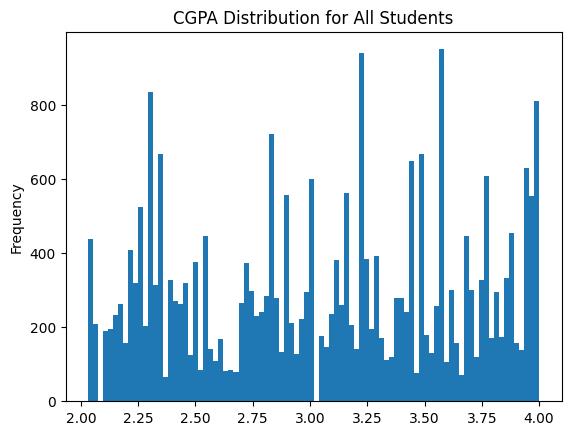

In [75]:
final_df['CGPA'].plot(kind='hist',bins=90)
plt.title('CGPA Distribution for All Students')